In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
mary_path ='C:/Users/embibe/Documents/Python Scripts/MaryProblem.csv'
mary_data = pd.read_csv(mary_path)

In [3]:
mary_data.head()

,Temperature in degree Celcius,Wind Speed in Km/h,Mary's perception
0,10,0,Cold
1,25,0,Warm
2,15,5,Cold
3,20,3,Warm
4,18,7,Cold


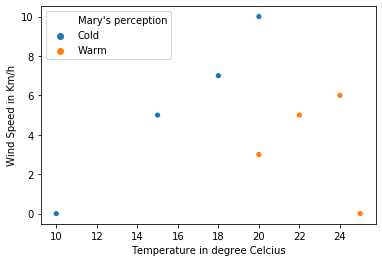

In [4]:
sns.scatterplot(x=mary_data['Temperature in degree Celcius'], y=mary_data['Wind Speed in Km/h'], hue=mary_data["Mary's perception"])

In [5]:
#import label encoder
from sklearn import preprocessing
#creating label encoder
le=preprocessing.LabelEncoder()
perception_encoded = le.fit_transform(mary_data["Mary's perception"])
perception_encoded

array([0, 1, 0, 1, 0, 0, 1, 1])

In [6]:
#Combining Temperature Data and Wind Speed Data
feature = list(zip(mary_data['Temperature in degree Celcius'],mary_data['Wind Speed in Km/h']))
feature

[(10, 0), (25, 0), (15, 5), (20, 3), (18, 7), (20, 10), (22, 5), (24, 6)]

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbor=[1,3,5]
final_predictions = {}
Key = ['k=0','k=1','k=2','k=3','k=4','k=5']
for z in neighbor:
    predictions = []
    points_x = []
    points_y = []
    model = KNeighborsClassifier(n_neighbors=z)
    model.fit(feature,perception_encoded)
    for i in range(25):
        for j in range(11):
            predictions.append(model.predict([[i,j]])[0])
            points_x.append(i)
            points_y.append(j)
    final_predictions[Key[z]]=predictions
    #final_predictions['k ='+str(z)]=predictions

In [8]:
for key in neighbor:
    for k in range(275):
        if final_predictions['k='+str(key)][k]==0:
            final_predictions['k='+str(key)][k] = 'Cold'
        else:
            final_predictions['k='+str(key)][k] = 'Warm'

Text(0, 0.5, 'Wind Speed in Km/h')

<Figure size 432x288 with 0 Axes>

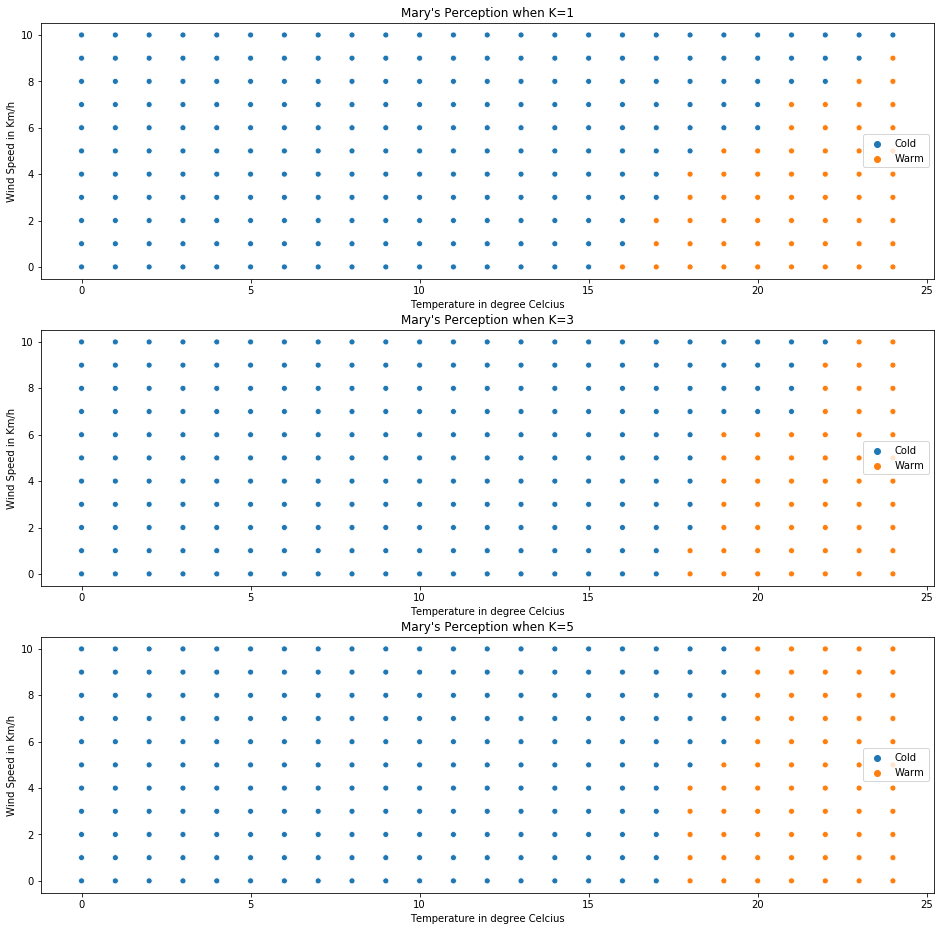

In [9]:
plt.figure()
plt.figure(figsize=(16,16))
plt.subplot(3,1,1)
sns.scatterplot(x=points_x, y=points_y, hue=final_predictions['k=1'])
plt.title("Mary's Perception when K=1")
plt.xlabel('Temperature in degree Celcius')
plt.ylabel('Wind Speed in Km/h')
plt.subplot(3,1,2)
sns.scatterplot(x=points_x, y=points_y, hue=final_predictions['k=3'])
plt.title("Mary's Perception when K=3")
plt.xlabel('Temperature in degree Celcius')
plt.ylabel('Wind Speed in Km/h')
plt.subplot(3,1,3)
sns.scatterplot(x=points_x, y=points_y, hue=final_predictions['k=5'])
plt.title("Mary's Perception when K=5")
plt.xlabel('Temperature in degree Celcius')
plt.ylabel('Wind Speed in Km/h')